# LangGraph Workflow Visualization Demo

This notebook demonstrates how to visualize the Synthetic Audience Generator workflow using LangGraph's Mermaid diagram capabilities.

## Features Demonstrated:
- Generate Mermaid diagram code
- Display workflow diagram inline
- Save workflow diagram as PNG
- Analyze workflow structure

In [1]:
# Import required libraries
import sys
from pathlib import Path
from IPython.display import Image, display

# Add current directory to path for imports
sys.path.append(str(Path.cwd()))

from synthetic_audience_mvp import SyntheticAudienceGenerator

/Users/ravikumar/Developer/Synthetic-Audience/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Initialize the Generator

In [2]:
# Initialize the Synthetic Audience Generator
print("🔄 Initializing Synthetic Audience Generator...")
generator = SyntheticAudienceGenerator()
print("✅ Generator initialized successfully")

2025-11-23 12:00:22,018 - INFO - Creating LangGraph workflow...
2025-11-23 12:00:22,019 - INFO - Synthetic Audience Generator initialized with LangGraph workflow


🔄 Initializing Synthetic Audience Generator...
✅ Generator initialized successfully


## 2. Display Workflow Diagram

This will generate and display the workflow diagram inline using `IPython.display.Image`:

2025-11-23 12:00:23,594 - INFO - Generating workflow visualization...


📊 Generating workflow visualization...


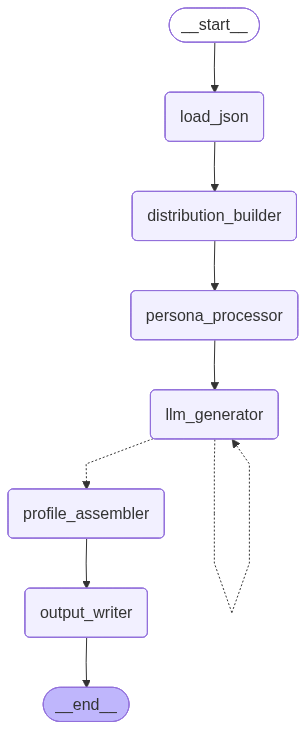

✅ Workflow diagram displayed above


In [3]:
# Generate and display the workflow visualization
print("📊 Generating workflow visualization...")
image = generator.visualize_workflow(display_image=True)

if image:
    print("✅ Workflow diagram displayed above")
else:
    print("❌ Failed to generate workflow diagram")

2025-11-23 12:01:25,555 - INFO - Generating workflow visualization...
2025-11-23 12:01:25,641 - INFO - Workflow diagram saved to workflow.png


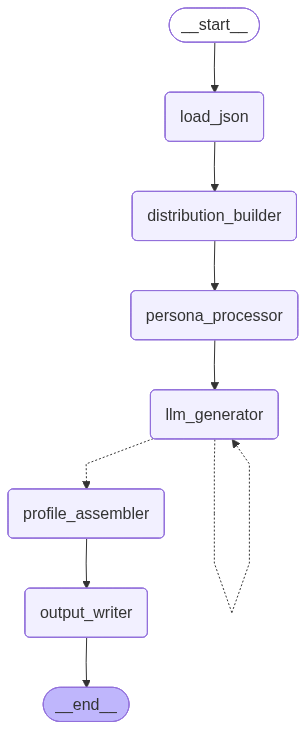

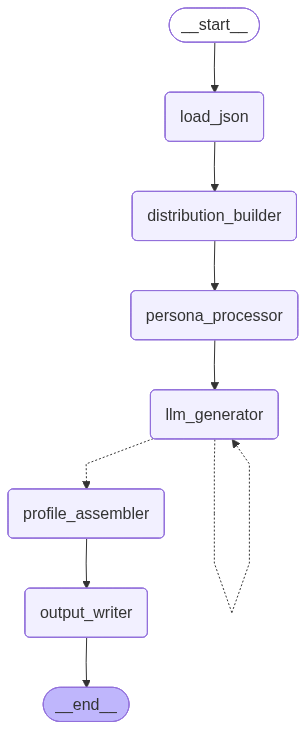

In [5]:
generator.visualize_workflow(save_path="workflow.png")

## 3. Get Mermaid Code

You can also get the raw Mermaid code to use in other tools:

In [4]:
# Get the Mermaid diagram code
mermaid_code = generator.get_workflow_mermaid_code()

print("📋 Mermaid Diagram Code:")
print("=" * 50)
print(mermaid_code)
print("=" * 50)
print("\n💡 You can copy this code to https://mermaid.live/ to view and edit online")

📋 Mermaid Diagram Code:
---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	load_json(load_json)
	distribution_builder(distribution_builder)
	persona_processor(persona_processor)
	llm_generator(llm_generator)
	profile_assembler(profile_assembler)
	output_writer(output_writer)
	__end__([<p>__end__</p>]):::last
	__start__ --> load_json;
	distribution_builder --> persona_processor;
	load_json --> distribution_builder;
	output_writer --> __end__;
	persona_processor --> llm_generator;
	profile_assembler --> output_writer;
	llm_generator -.-> profile_assembler;
	llm_generator -.-> llm_generator;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc


💡 You can copy this code to https://mermaid.live/ to view and edit online


## 4. Save Workflow Diagram

Save the diagram as a PNG file for use in documentation:

In [ ]:
# Save the workflow diagram
output_path = "notebook_workflow_diagram.png"
result = generator.visualize_workflow(save_path=output_path, display_image=False)

if result:
    print(f"✅ Workflow diagram saved to: {output_path}")
    print(f"📁 File size: {len(result):,} bytes")
    
    # Display the saved image
    print("\n📸 Displaying saved image:")
    display(Image(output_path))
else:
    print("❌ Failed to save workflow diagram")

## 5. Analyze Workflow Structure

In [ ]:
# Analyze the workflow structure
graph = generator.app.get_graph()
nodes = list(graph.nodes.keys())
edges = list(graph.edges)

print("🏗️ Workflow Structure Analysis")
print("=" * 40)
print(f"📋 Total Nodes: {len(nodes)}")
print(f"🔀 Total Edges: {len(edges)}")

print("\n🔗 Workflow Nodes:")
for i, node in enumerate(nodes, 1):
    print(f"   {i}. {node}")

print("\n➡️ Workflow Flow:")
for edge in edges:
    print(f"   {edge[0]} → {edge[1]}")

print("\n📊 Node Types:")
processing_nodes = [n for n in nodes if n not in ['__start__', '__end__']]
print(f"   • Start/End nodes: 2")
print(f"   • Processing nodes: {len(processing_nodes)}")
print(f"   • Processing steps: {', '.join(processing_nodes)}")

## 6. Workflow Description

The Synthetic Audience Generator workflow consists of the following steps:

1. **load_json**: Load and validate input JSON file
2. **distribution_builder**: Generate demographic distribution schedule
3. **persona_processor**: Extract behavioral templates from personas
4. **llm_generator**: Generate behavioral content (loops until all profiles complete)
5. **profile_assembler**: Assemble and validate final audience profiles
6. **output_writer**: Write final audience to JSON file

The workflow uses LangGraph's conditional edges to handle the iterative profile generation process efficiently.